In [502]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
import matplotlib.patches as mpatches

%matplotlib inline

# Gathering Data

## 1. Twitter Enhanced Dataset
- Source: Local File

In [275]:
df_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
#Checking top entries
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#Checking bottom most entries
df_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


## 2. Image Predictions
- Source: URL

In [7]:
df_img_pred=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',sep='\t')


In [8]:
df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Twitter API
- Source: API

In [9]:
# Twitter API for more data (save to local file)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [10]:
#Storing list of tweets ids to get their content later
tweets_id=df_enhanced["tweet_id"]

In [11]:
#Creating a list to store tweet_ids which we fail to get content from (possibly deleted)
del_tweets=[]

#creating and opening file to write the data into
with open('tweet_json.txt',mode='w') as file:
    for uid in tweets_id:
        try:
            #fetching tweet content and storing it 
            tweet=api.get_status(uid,tweet_mode='extended')
            json.dump(tweet._json,file)
            #Writing new observation in a newline 
            file.write("\n")
        except:
            del_tweets.append(uid)
            print("Error fetching Tweet ID: ",uid)

Error fetching Tweet ID:  888202515573088257
Error fetching Tweet ID:  873697596434513921
Error fetching Tweet ID:  872668790621863937
Error fetching Tweet ID:  872261713294495745
Error fetching Tweet ID:  869988702071779329
Error fetching Tweet ID:  866816280283807744
Error fetching Tweet ID:  861769973181624320
Error fetching Tweet ID:  845459076796616705
Error fetching Tweet ID:  842892208864923648
Error fetching Tweet ID:  837012587749474308
Error fetching Tweet ID:  827228250799742977
Error fetching Tweet ID:  812747805718642688
Error fetching Tweet ID:  802247111496568832
Error fetching Tweet ID:  775096608509886464
Error fetching Tweet ID:  770743923962707968
Error fetching Tweet ID:  754011816964026368
Error fetching Tweet ID:  680055455951884288


In [12]:
#To understand how our extracted JSON format is 
with open('tweet_json.txt','r') as data:
    tweet_json = data.readline()
    print(tweet_json)


{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

 - Every Line acts as an individual observation/record
 - Reference : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

In [13]:
#Converting collected data from API into a DataFrame
df_tweet=pd.read_json('tweet_json.txt',orient='records',lines=True)
#Checking Dataset Dimensions
print(df_tweet.shape)

(2339, 32)


In [14]:
df_tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37804,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8246,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32490,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6091,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24453,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4029,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41153,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8389,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39340,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9094,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [15]:
#printing out the columns to figure out which one we will be using
df_tweet.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [16]:
#Filtering the columns required into our final Tweets dataset
df_tweet=df_tweet[["id","favorite_count","retweet_count","retweeted"]]
df_tweet.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37804,8246,False
1,892177421306343426,32490,6091,False
2,891815181378084864,24453,4029,False
3,891689557279858688,41153,8389,False
4,891327558926688256,39340,9094,False


We have finished Gathering the required data

#  Assessing Data

## 1. Enhanced Dataset

In [17]:
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- Stages of dogs are seperated which is reponsible for many null values 

In [18]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- Data type wrongly interpreted of many columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp and retweeted_status_timestamp)
- Retweets are present in the dataset as well
- Some of the expanded URLs are missing
- Missing Values in dog stages columns (doggo,floofer,pupper,puppo) are registered as None

In [19]:
#Checking the example of names in the dataset
df_enhanced["name"].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
Buddy             7
an                7
Daisy             7
Toby              7
Oscar             6
Bella             6
Scout             6
Stanley           6
Jax               6
Dave              6
Leo               6
Jack              6
Milo              6
Rusty             6
Koda              6
Oakley            5
               ... 
Alexanderson      1
Shnuggles         1
Lambeau           1
Tupawc            1
incredibly        1
Schnozz           1
Rufio             1
Eugene            1
Snoopy            1
Margo             1
Bowie             1
Bilbo             1
Jimbo             1
Boots             1
Noah              1
Colin             1
Wishes            1
Ito               1
Eevee             1


- Names have been incorrectly entered, such as 'a','such','an' etc.

In [50]:
df_enhanced.query('doggo=="None" and floofer=="None" and pupper=="None" and puppo=="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


- Instances where stages of dog hasn't been mentioned

In [52]:
#Number of unique sources
df_enhanced['source'].nunique()

4

In [53]:
#Types of Source
df_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- Types of sources not human readable/clearly understood


## 2. Image Prediction Dataset

In [20]:
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True



- Some dog breeds are Capitalized, others are in all small case letters

In [22]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
len(df_img_pred.query('p1_dog==False and p2_dog==False and p3_dog==False'))

324

- Some objects appear to be not dogs at all, by the image prediction algorithm, which suggests they might not be a dog afterall.

In [51]:
df_img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## 3. Twitter API

In [27]:
df_tweet

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37804,8246,False
1,892177421306343426,32490,6091,False
2,891815181378084864,24453,4029,False
3,891689557279858688,41153,8389,False
4,891327558926688256,39340,9094,False
5,891087950875897856,19777,3015,False
6,890971913173991426,11563,1994,False
7,890729181411237888,63762,18315,False
8,890609185150312448,27188,4146,False
9,890240255349198849,31165,7159,False


In [28]:
len(df_tweet.query('retweeted==True'))

0

## Assessment Summary

### Quality

<b> df_enhanced </b>

- Data type wrongly interpreted of many columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp and retweeted_status_timestamp)
- Retweets are present in the dataset as well
- Some of the expanded URLs are missing
- Missing Values in dog stages columns (doggo,floofer,pupper,puppo) are registered as None
- Names have been incorrectly entered, such as 'a','such','an' etc.
- Types of sources not human readable/clearly understood
- Change all numerator to 10 and scale numerator accordingly for better comparison

<b> df_image_pred</b>

- Some dog breeds are Capitalized, others are in all small case letters
- Some objects appear to be not dogs at all, by the image prediction algorithm, which suggests they might not be a dog afterall.
- Converting Dog Breeds into Categories

### Tidiness
- 3 datasets instead of 1 master dataset

<b> df_enhanced </b>

- Indiviual dogs stages columns need to be converted into a single categorical column
- Unnecessary columns need to be removed


# Cleaning

- First we make copies of original dataset in which we will apply our cleaning techniques

In [177]:
df_enhanced_clean=df_enhanced.copy()
df_img_pred_clean=df_img_pred.copy()
df_tweet_clean=df_tweet.copy()

# Quality

## 1. Twitter Enhanced Dataset

### 1.1
<b> Define </b>

Data type wrongly interpreted of many columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp and retweeted_status_timestamp).

<b> Code </b>

columns in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id will be converted into string.<br>
Whereas timestamp and retweeted_status_timestamp will be converted into datetime

In [178]:
# To datetime
df_enhanced_clean.timestamp = pd.to_datetime(df_enhanced_clean.timestamp)
df_enhanced_clean.retweeted_status_timestamp = pd.to_datetime(df_enhanced_clean.retweeted_status_timestamp)
# To string
df_enhanced_clean.in_reply_to_status_id=df_enhanced_clean.in_reply_to_status_id.astype(str)
df_enhanced_clean.in_reply_to_user_id=df_enhanced_clean.in_reply_to_user_id.astype(str)
df_enhanced_clean.retweeted_status_id=df_enhanced_clean.retweeted_status_id.astype(str)
df_enhanced_clean.retweeted_status_user_id=df_enhanced_clean.retweeted_status_user_id.astype(str)

<b> Test </b>

In [179]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: dateti

### 1.2

<b> Define </b>

Retweeted tweets are present in the dataset which count for duplicate ratings for a single dog

<b> Code </b>

Filter out the records which have non-null values in the retweet_status_id 

In [180]:
df_enhanced_clean=df_enhanced_clean.query('retweeted_status_id == "nan"')

<b> Test </b>

In [181]:
len(df_enhanced_clean.query('retweeted_status_id != "nan"'))

0

### 1.3

<b> Define </b>

Some of the expanded URLs are missing. From the Twitter API Documentation, we know that tweet_id is an extention to 'https://twitter.com/dog_rates/status/' which gives us the URL to the tweet we are looking at

<b> Code </b>

For places where expanded URL is null, we will add the https://twitter.com/dog_rates/status/ and tweet_id column, and convert into a string to store in.

In [182]:
 def form_link(rec):
    if pd.notnull(rec['expanded_urls']):
        return rec
    else:
        tid = rec['tweet_id']
        rec['expanded_urls'] = 'https://twitter.com/dog_rates/status/' +str(tweet_id)
        return rec


df_enhanced_clean = df_enhanced_clean.apply(form_link, axis=1)

<b> Test </b>

In [183]:
df_enhanced_clean[df_enhanced_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 1.4 

<b> Define </b> 

Missing Values in dog stages columns shown as "None"

<b> Test </b> 

Change the "None" in all 4 columns into np.nan

In [184]:
df_enhanced_clean.doggo=df_enhanced_clean.doggo.replace("None",np.nan,regex=True)
df_enhanced_clean.floofer=df_enhanced_clean.floofer.replace("None",np.nan,regex=True)
df_enhanced_clean.pupper=df_enhanced_clean.pupper.replace("None",np.nan,regex=True)
df_enhanced_clean.puppo=df_enhanced_clean.puppo.replace("None",np.nan,regex=True)

<b> Test </b>

In [185]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](

### 1.5

<b> Define </b>

Some dog names present under name columns are not nouns but are just some random words. Most/all of these words are lower case letters (a,the,an etc.) where as actual names are capitalized (Zoey,Tessa,Cody etc.)

<b> Code </b>

converting all the names beginning with lowercase letters into np.nan

In [186]:
def remove_words(rec):
    if rec['name'].islower():
        rec['name']=np.nan
        return rec
    else:
        return rec
    
df_enhanced_clean = df_enhanced_clean.apply(remove_words, axis=1)

<b> Test </b>

In [187]:
df_enhanced_clean.name.value_counts()

None       680
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         8
Toby         7
Daisy        7
Jax          6
Oscar        6
Koda         6
Bo           6
Stanley      6
Bailey       6
Bella        6
Milo         5
Buddy        5
Bentley      5
Louis        5
Dave         5
Leo          5
Rusty        5
Chester      5
Scout        5
Sammy        4
George       4
          ... 
Timison      1
Lipton       1
Jarod        1
Willy        1
Bradley      1
Kulet        1
Stu          1
Cermet       1
Sailer       1
Mosby        1
Aja          1
Rodman       1
Brady        1
Margo        1
Bowie        1
Bilbo        1
Jimbo        1
Boots        1
Noah         1
Colin        1
Maisey       1
Ito          1
Snoopy       1
Eevee        1
Tedrick      1
Zara         1
Claude       1
Brat         1
Stormy       1
Dug          1
Name: name, Length: 931, dtype: int64

### 1.6 

<b> Define </b>

Types of sources not human readable/clearly understood, since they are written in HTML tags format, it is difficult for a normal person to understand.

<b> Code </b> 

Extract the text between the anchor tags to extract the actual source used

In [208]:
def source(rec):
    source_list=[]
    pattern = re.compile('llow">(.*?)</a>')
    for tag in rec['source']:
        m = re.search(pattern, tag)
        src=m.group(1)
        source_list.append(src)
    return source_list

src=source(df_enhanced_clean)
df_enhanced_clean['source']=src

<b> Test </b>

In [209]:
df_enhanced_clean.source.value_counts()


Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### 1.7 

<b> Define </b>

The denominator of ratings are almost always 10, but not always. We can bring them all down to 10, and scale down the numerator accordingly wherever needed

<b> Code </b>

We will divide the numerator column by the denominator column and then multiply it by 10 to get the rating out of ten, and then drop the denominator column which will no longer be needed

In [211]:
df_enhanced_clean.rating_numerator=(df_enhanced_clean.rating_numerator/df_enhanced_clean.rating_denominator)*10


In [235]:
df_enhanced_clean[df_enhanced_clean['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,nan,nan,NaT,https://twitter.com/dog_rates/status/835246439...,inf,0,None,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875475599974e+17,30582082.0,2017-02-16 04:45:50,Twitter for iPhone,@docmisterio account started on 11/15/15,nan,nan,NaT,https://twitter.com/dog_rates/status/832088576...,7.333333,15,None,NaN,NaN,NaN,NaN
433,820690176645140481,nan,nan,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,nan,nan,NaT,https://twitter.com/dog_rates/status/820690176...,12.000000,70,None,NaN,NaN,NaN,NaN
516,810984652412424192,nan,nan,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,nan,nan,NaT,"https://www.gofundme.com/sams-smile,https://tw...",34.285714,7,Sam,NaN,NaN,NaN,NaN
902,758467244762497024,nan,nan,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,nan,nan,NaT,https://twitter.com/dog_rates/status/758467244...,11.000000,150,None,NaN,NaN,NaN,NaN
1068,740373189193256964,nan,nan,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",nan,nan,NaT,https://twitter.com/dog_rates/status/740373189...,8.181818,11,None,NaN,NaN,NaN,NaN
1120,731156023742988288,nan,nan,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,nan,nan,NaT,https://twitter.com/dog_rates/status/731156023...,12.000000,170,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,nan,nan,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,nan,nan,NaT,https://twitter.com/dog_rates/status/722974582...,2.000000,20,None,NaN,NaN,NaN,NaN
1202,716439118184652801,nan,nan,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,nan,nan,NaT,https://twitter.com/dog_rates/status/716439118...,10.000000,50,Bluebert,NaN,NaN,NaN,NaN
1228,713900603437621249,nan,nan,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,nan,nan,NaT,https://twitter.com/dog_rates/status/713900603...,11.000000,90,None,NaN,NaN,NaN,NaN


In [238]:
#Found two Errors while visualising
df_enhanced_clean.loc[2335,'rating_numerator']=9
df_enhanced_clean.loc[313,'rating_numerator']=13

In [239]:
df_enhanced_clean.drop(['rating_denominator'],axis=1,inplace=True)

<b> Test </b>

In [240]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null float64
name                          2071 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(12)
memory usag

## 2. Image Prediction Dataset

### 2.1

<b> Define </b>

There are instances where the machine learning algorithm has predicted that the images posted alongside the tweet is not a dog in all it's three predictions

<b> Code </b>

Filter out the instances where the algortihm predicts that the image is not of a dog in all 3 instances

In [242]:
df_img_pred_clean=df_img_pred_clean.query('p1_dog == True or p2_dog == True or p3_dog == True')

<b> Test </b>

In [244]:
len(df_img_pred_clean.query('p1_dog == False and p2_dog == False and p3_dog == False'))

0

### 2.2 

<b> Define </b>

Some breed names are capitalized while the rest are not and there is an underscore in place of space in the breed names 

<b> Code </b>

Capitalising every string under columns p1,p2,p3 using .capitalize() function

In [245]:
#Capitalizing Breed Names
df_img_pred_clean['p1'] = df_img_pred_clean.p1.str.capitalize()
df_img_pred_clean['p2'] = df_img_pred_clean.p2.str.capitalize()
df_img_pred_clean['p3'] = df_img_pred_clean.p3.str.capitalize()

In [247]:
#Replacing _ with ' ' in the columns
df_img_pred_clean['p1']=df_img_pred_clean['p1'].replace("_",r' ',regex=True)
df_img_pred_clean['p2']=df_img_pred_clean['p2'].replace("_",r' ',regex=True)
df_img_pred_clean['p3']=df_img_pred_clean['p3'].replace("_",r' ',regex=True)

<b> Test </b>

In [248]:
df_img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 2.3

<b> Define </b>

Dogs Breeds are being intepreted as solely strings by the program whereas is is used to classify them as well

<b> Code </b>

Convert datatype into category

In [251]:
df_img_pred_clean['p1']=df_img_pred_clean['p1'].astype('category')
df_img_pred_clean['p2']=df_img_pred_clean['p2'].astype('category')
df_img_pred_clean['p3']=df_img_pred_clean['p3'].astype('category')

<b> Test </b>

In [252]:
df_img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null category
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null category
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null category
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 146.5+ KB


# Tidiness

# 1.Twitter Enhanced Dataset

### 1.1

<b> Define </b>

Removing unnecessary columns which we do not need any more before we merge it into a dataset


In [253]:
df_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,NaN,NaN,NaN


In [255]:
df_enhanced_clean.drop(['retweeted_status_timestamp','retweeted_status_user_id','retweeted_status_id'],axis=1,inplace=True)

<b> Test </b>

In [256]:
df_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

### 1.2 

<b> Define </b>

The different stages of dogs are expanded as different variables in the dataset whereas in reality its a should be a single categorical value denoting the stage of a dog

<b> Code </b>

While keeping other columns constant, the columns ('doggo' ,'floofer', 'pupper', 'puppo') will be melted into one column

We have to keep in mind that one dog can be in more than one stage since the terms are vaguely defined

In [280]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null float64
name                     2071 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 317.9+ KB


In [342]:
# Create new column for dog stages 
df_enhanced_clean['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    if len(stage)==0: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # If there is more than 1 stage
        row['dog_stage'] = ','.join(stage)
    
    return row

df_enhanced_clean = df_enhanced_clean.apply(dog_stage, axis=1)


In [348]:
#Dropping the redundant columns 
df_enhanced_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

<b> Test </b>

In [343]:
df_enhanced_clean.dog_stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### 2.0

<b> Define </b>

Creating a Master Dataset

<b> Code </b>

Merging all tables using tweet_id as the primary key and by inner join, so we have a tight dataset of tweets for which we have all data available

In [346]:
df_tweet_clean.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37804,8246,False
1,892177421306343426,32490,6091,False
2,891815181378084864,24453,4029,False
3,891689557279858688,41153,8389,False
4,891327558926688256,39340,9094,False


In [349]:
df_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None


In [374]:
df_master_1=pd.merge(left=df_enhanced_clean,right=df_tweet_clean,left_on='tweet_id',right_on='id',how='inner')

In [375]:
df_master_1.drop(['id','retweeted'],axis=1,inplace=True)
df_master_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None,37804,8246
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,32490,6091
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,24453,4029
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,41153,8389
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,39340,9094


In [376]:
df_master=pd.merge(left=df_master_1,right=df_img_pred_clean,on='tweet_id',how='inner')

<b> Test </b>

In [377]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,...,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
3,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,...,2,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
4,891087950875897856,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,None,...,1,Chesapeake bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False


In [378]:
df_master.shape

(1683, 23)

In [416]:
#Changing source into category
df_master['source']=df_master['source'].astype('category')
df_master['dog_stage']=df_master['dog_stage'].astype('category')

df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 0 to 1682
Data columns (total 23 columns):
tweet_id                 1683 non-null int64
in_reply_to_status_id    1683 non-null object
in_reply_to_user_id      1683 non-null object
timestamp                1683 non-null datetime64[ns]
source                   1683 non-null category
text                     1683 non-null object
expanded_urls            1683 non-null object
rating_numerator         1683 non-null float64
name                     1603 non-null object
dog_stage                1683 non-null category
favorite_count           1683 non-null int64
retweet_count            1683 non-null int64
jpg_url                  1683 non-null object
img_num                  1683 non-null int64
p1                       1683 non-null category
p1_conf                  1683 non-null float64
p1_dog                   1683 non-null bool
p2                       1683 non-null category
p2_conf                  1683 non-null float64
p2_dog

# Storing Final Dataset

In [417]:
df_master.to_csv('twitter_archive_master.csv',index=False)

In [418]:
df=pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,...,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,...,2,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,None,...,1,Chesapeake bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False


In [419]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator', 'name',
       'dog_stage', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

# Analysis

## I. Does more number of tweets ensure that you're the most loved breed among the Twitter population?

Text(0.5,1,'Most Tweeted Dog Breeds')

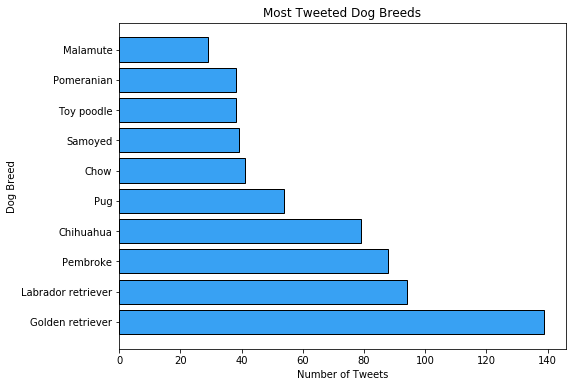

In [440]:
#Counting the number of tweets made for every category of dog breed
most_tweeted = df.groupby('p1').count().reset_index()
#Keeping the Top 10 most tweeted dog breeds
df_sorted = most_tweeted.sort_values('favorite_count', ascending=False).head(10)
ser_twt = df_sorted['favorite_count']
most_breed = df_sorted['p1']
#Plotting the Information
fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(most_breed, ser_twt, color = "#38A1F3",edgecolor = ['Black']*10)
plt.ylabel('Dog Breed')
plt.xlabel('Number of Tweets')
plt.title('Most Tweeted Dog Breeds')

As we can see these are the most tweeted dog breeds when it comes to the @WeRateDogs page, and since this page is globally known (>4 million followers) and does not primarily focus on one type of breed, we can assume that the insights we have gained can hold true for the global population.

- The graph shows the Top 10 most tweeted about dog breeds. Golden Retrievers and Labrador Retrievers top the chart at 1st and 2nd place respectively
- If more number of tweets leads to more love for the breed among the twitter population, then atleast 50% of the dog breeds should remain on the top chart when we will be analysing the response to the tweets


Text(0.5,1,'Number of Favorites by Breed')

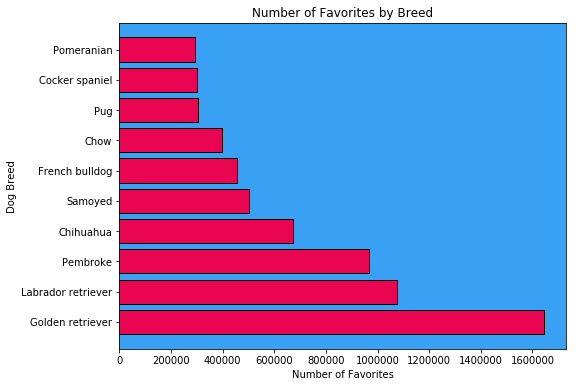

In [441]:
df_favorite = df.groupby('p1')['favorite_count'].sum().reset_index()
df_sorted = df_favorite.sort_values('favorite_count', ascending=False).head(10)
ser_fav = df_sorted['favorite_count']
ser_breed = df_sorted['p1']
#E90552
fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(ser_breed, ser_fav, color = "#E90552", edgecolor = ['Black']*10)
ax.set_facecolor('#38A1F3')
plt.ylabel('Dog Breed')
plt.xlabel('Number of Favorites')
plt.title('Number of Favorites by Breed')

In [411]:
#Find the Common Breeds between The two lists
list(set(ser_breed)&set(most_breed))

['Pomeranian',
 'Samoyed',
 'Labrador retriever',
 'Chow',
 'Chihuahua',
 'Golden retriever',
 'Pembroke',
 'Pug']

Text(0.5,1,'Number of Retweets by Breed')

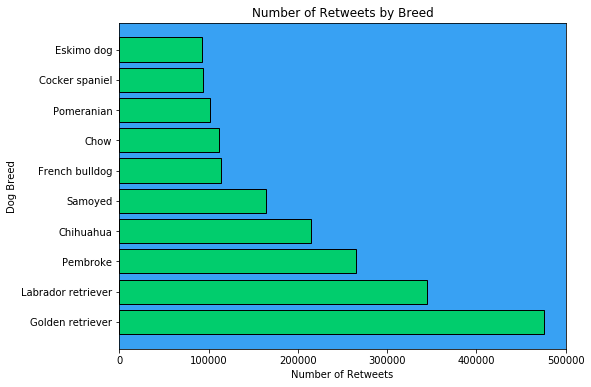

In [442]:
df_favorite = df.groupby('p1')['retweet_count'].sum().reset_index()
df_sorted = df_favorite.sort_values('retweet_count', ascending=False).head(10)
ser_ret = df_sorted['retweet_count']
ret_breed = df_sorted['p1']
#E90552
fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(ret_breed, ser_ret, color = "#01CD6D", edgecolor = ['Black']*10)
ax.set_facecolor('#38A1F3')
plt.ylabel('Dog Breed')
plt.xlabel('Number of Retweets')
plt.title('Number of Retweets by Breed')

In [426]:
list(set(ret_breed)&set(most_breed))

['Pomeranian',
 'Samoyed',
 'Labrador retriever',
 'Chow',
 'Chihuahua',
 'Golden retriever',
 'Pembroke']

We used both, the total number of retweets as well as the total number of favorites as a metric to determine the popularity of a breed among the twitter population

- Every breed listed in the top 10 favorites list had atleast over 200K favorites and peaked at over 1.6 Million (Golden Retriever)

- Incase of Retweets, they ranged from 100K to just below 500K retweets

- Golden Retriever topped the chart in both metrics

- The intersection of breeds between all three top 10 (Tweets,Retweets,Favorites) retained 70% of the dog breeds mentioned in the Top 10 most tweeted dogs

In [443]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.683000e+03,2.000000e+01,2.000000e+01,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1.683000e+03
mean,7.392184e+17,6.949452e+17,4.196984e+09,10.892948,8993.488414,2677.474153,1.215686,0.604703,0.137223,6.142934e-02
std,6.797310e+16,4.455933e+16,0.000000e+00,2.505686,13181.604124,4854.040142,0.576340,0.266333,0.101185,5.188880e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,77.000000,11.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,6.773331e+17,6.716877e+17,4.196984e+09,10.000000,2040.500000,599.500000,1.000000,0.378397,0.055020,1.605405e-02
50%,7.131775e+17,6.756022e+17,4.196984e+09,11.000000,4199.000000,1328.000000,1.000000,0.606654,0.121488,4.998820e-02
75%,7.931732e+17,6.947919e+17,4.196984e+09,12.000000,11102.000000,3029.500000,1.000000,0.849540,0.198406,9.470910e-02
max,8.921774e+17,8.558181e+17,4.196984e+09,75.000000,163279.000000,83034.000000,4.000000,0.999984,0.467678,2.734190e-01


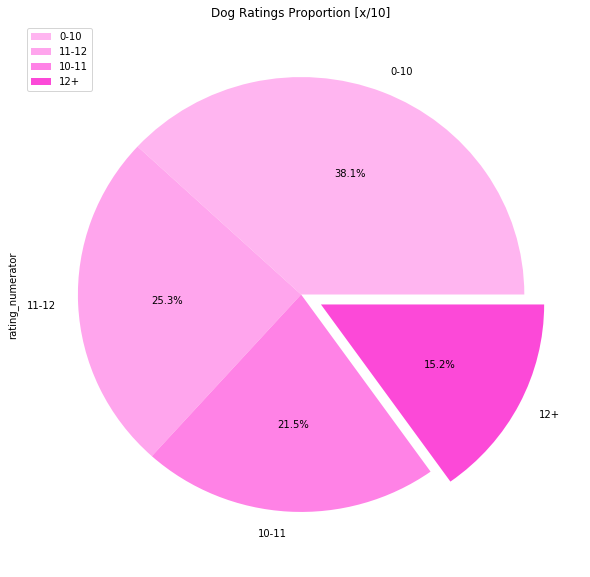

In [466]:
#Dividing the Rating Distribution in 4 quadrants 
label=['0-10','10-11','11-12','12+']
labelled_bins = pd.qcut(df['rating_numerator'], 4, labels = label)
#Plotting a Pie Chart to show the proportion of ratings among different quadrants
fig, ax = plt.subplots(figsize=(10,10))
labelled_bins.value_counts().plot(kind = 'pie', ax = ax,autopct='%1.1f%%',explode=[0,0,0,0.1],colors=['#ffb5f0','#ffa5ed','#ff82e6','#fc49d8'])
plt.title('Dog Ratings Proportion [x/10]')
plt.legend(loc='upper left');

We were shown that numerators>denominators while rating are quite a common phenomenon on this page. To understand this better and verify it, we scaled up/down all the ratings in accordance with the denominator = 10 since its the most common denominator

- We can see that approximately 15.2% of total ratings were above 12/10
- A total of 62% of ratings were equal or above 10/10  which shows that rating out of bounds is a common phenomenon in this place
- But still this doesn't stop people from being realistic a rating the dogs within the bounds of 0-10 which accounts for a total of 38.1% of the ratings

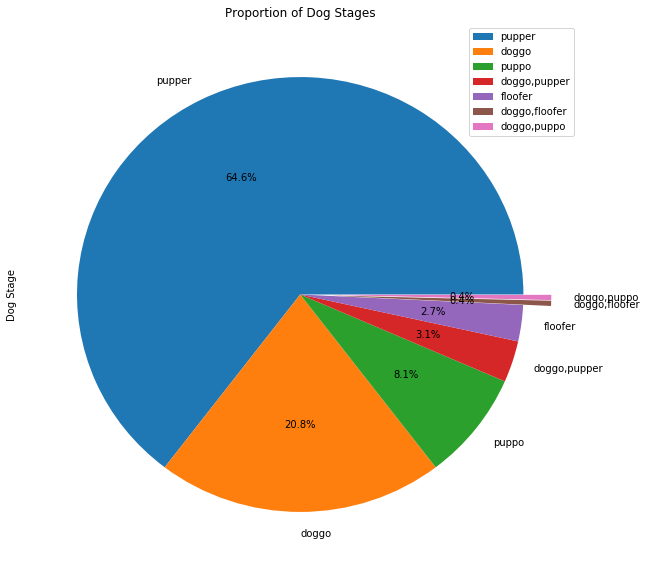

In [471]:
# Excluding the cases where the dog stage is missing.
df_stages = df[df['dog_stage'] != "None"]
fig, ax = plt.subplots(figsize=(10,10))

df_stages['dog_stage'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%',explode=[0,0,0,0,0,0.125,0.125])
plt.title('Proportion of Dog Stages')
plt.legend();

After filtering out the dataset for the records of which dog_stage was unknown, we created a pie chart to see what was the distribution of dog_stages among the WeRateDogs' Dog population

- More than half of it was covered by puppers: A doggo that is inexperienced,unfamiliar or in anyway unprepared for the responsibilities asscociated with being a doggo
- 1/5th of the population was covered by the more mature Doggo population
- Even though the terms are pretty much vague, there is only 0.8% of the population where there is more than one dog stage entered

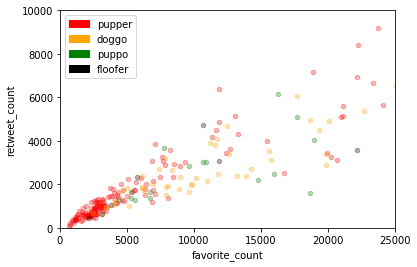

In [517]:
df_puppers = df_stages[df_stages['dog_stage'] == 'pupper']
df_puppo = df_stages[df_stages['dog_stage'] == 'puppo']
df_doggo = df_stages[df_stages['dog_stage'] == 'doggo']
df_floofer = df_stages[df_stages['dog_stage'] == 'floofer']


#Zooming in to leave the outliers
xlimits = (0, 25000)
ylimits = (0, 10000)

ax = df_puppers.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', alpha=0.3, ylim=ylimits, xlim=xlimits)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Orange', ax=ax, alpha=0.3, ylim=ylimits, xlim=xlimits)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', ax=ax, alpha=0.3, ylim=ylimits, xlim=xlimits)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Black', ax=ax, alpha=0.3, ylim=ylimits, xlim=xlimits)



puppers = mpatches.Patch(label='pupper', color = 'Red')
doggo = mpatches.Patch(label='doggo', color = 'Orange')
puppo = mpatches.Patch(label='puppo', color = 'Green')
floofer = mpatches.Patch(label='floofer', color = 'Black')

plt.legend(handles=[puppers, doggo, puppo, floofer])


In order to see if we should use dog_stages as a factor to determine the retweet counts in our multiple regression, we need to visualise the relation between different dog_stages and the retweet_counts

- We can see that there is difference in ratings w.r.t dog_stages, such as doggos have much greater rating in general than the puppers who are mostly concentrated towards the origins.
- puppos seem to be very spread out and have to be reconsidered when making the model

# Multiple Regression

- Using Multiple Regression to estimate the retweet count given we have the dog stage and the numer of favorites it has recieved

In [474]:
#Creating Dummies
df_stages[['doggo','do-flo','do-pupper','do-puppo','floofer','pupper','puppo']]=pd.get_dummies(df_stages['dog_stage'])
df_stages.drop(['puppo'],axis=1,inplace=True)
df_stages['intercept']=1


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This i

In [501]:
#Creating dummy variables for Dog Stages
lm=sm.OLS(df_stages['retweet_count'],df_stages[['intercept','doggo','floofer','pupper','favorite_count']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     675.4
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          2.38e-134
Time:                        22:33:00   Log-Likelihood:                -2391.5
No. Observations:                 260   AIC:                             4793.
Df Residuals:                     255   BIC:                             4811.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept      -2232.8120    463.096     -4.821      0.000   -3144.792   -1320.832
doggo           1025.0052    543.923      1.884      0.061     -46.149    2096.159
floofer         1773.7999   1011.944      1.753      0.081    -219.033    3766.633
pupper          1562.6756    483.146      3.234      0.001     611.211    2514.140
favorite_count     0.4055      0.008     50.149      0.000       0.390       0.421
==============================================================================
Omnibus:                      126.298   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4183.407
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      22.491   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- When we tried to fit a linear, we obtained a regression line which could explain around 91.4% of variance but the condition number is so large, which indicates there might be a strong collinearity which is probably between favorite counts and retweets
- This is the best fit model which covers the most variance, have a low p-value and decreased the condition number significantly

In [ ]:
df['1']=df['2']+df['3']+df['4']